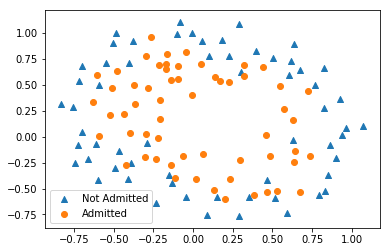

In [26]:
import csv
import sklearn as sk
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as pt
import numpy as np
import scipy
data = np.loadtxt(r'C:\Users\saminens\Desktop\ML\ex2data2.txt', delimiter=",")
x=data[:,0:2]
y=data[:,2:3]
pos=np.where(y==0)[0]
neg=np.where(y==1)[0]
pt.scatter(x[pos,0],x[pos,1],marker='^')
pt.scatter(x[neg,0],x[neg,1],marker='o')
pt.legend(['Not Admitted','Admitted'],fancybox=True)
pt.show()


In [27]:
pf=sk.preprocessing.PolynomialFeatures(6)
x_f=pf.fit_transform(data[:,0:2])
#noting dimensions is imp.
x_f.shape

(118, 28)

In [28]:
def sigmoid(z):
    g=1/(1 + np.exp(-z))
    return g

In [29]:
def h(theta,x_f):
   
    return sigmoid(x_f.dot(theta))

In [30]:
# here alpha is the regularisation parameter.
def costfunctionreg(theta,alpha,x,y):
    m=len(y)
    h1=h(theta,x_f).reshape(-1,1)
    reg= (alpha/2)*theta**2
    rcost= y.T*np.log(h1)+(1-y).T*np.log(1-h1)
    J= -sum(rcost)/m + sum(reg[1:])/m
    return(J[0])

In [31]:
y.shape


(118, 1)

In [32]:
def gradientreg(theta,alpha,x,y):
    m=len(y)
    h2=h(theta,x_f).reshape(-1,1)
    reg1= (alpha*theta)/m
    grad=(h2-y).T.dot(x_f)/m + reg1.T
    grad[0][0] -= reg1[0]
  #we need a column matrix  
    return np.ndarray.flatten(grad)

In [51]:
m,n=x_f.shape
itheta=np.zeros(n).reshape(-1,1)
cost=costfunctionreg(itheta,40,x_f,y)
grad=gradientreg(itheta,40,x_f,y)
grad


array([  8.47457627e-03,   1.87880932e-02,   7.77711864e-05,
         5.03446395e-02,   1.15013308e-02,   3.76648474e-02,
         1.83559872e-02,   7.32393391e-03,   8.19244468e-03,
         2.34764889e-02,   3.93486234e-02,   2.23923907e-03,
         1.28600503e-02,   3.09593720e-03,   3.93028171e-02,
         1.99707467e-02,   4.32983232e-03,   3.38643902e-03,
         5.83822078e-03,   4.47629067e-03,   3.10079849e-02,
         3.10312442e-02,   1.09740238e-03,   6.31570797e-03,
         4.08503006e-04,   7.26504316e-03,   1.37646175e-03,
         3.87936363e-02])

In [52]:
optim=scipy.optimize.minimize(costfunctionreg,itheta,jac=gradientreg,method='Nelder-Mead',args=(40,x_f,y),options={'maxiter':1000})
optim


C:\Users\saminens\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:381: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  RuntimeWarning)


 final_simplex: (array([[  5.23950748e-01,  -2.34683951e-02,   6.57529654e-03,
         -3.02979119e-02,  -1.88772484e-01,   1.81507061e-01,
          7.37160158e-02,  -1.04281492e-01,   5.54894346e-02,
          1.15535670e-02,   4.03360449e-01,  -1.41832559e-01,
         -4.00407216e-02,  -6.37992402e-02,   6.95527886e-02,
         -7.10714502e-02,   5.91606187e-03,   4.42864713e-02,
         -5.78230742e-02,  -1.28921447e-01,  -3.46223828e-03,
          9.38650068e-03,  -4.69591393e-01,   1.20596131e-01,
         -1.14743159e-01,  -1.45077310e-01,  -6.41768842e-02,
          9.28377136e-02],
       [  5.32008741e-01,  -2.43837184e-02,   4.03584699e-03,
         -3.54384001e-02,  -1.96735872e-01,   1.84303851e-01,
          7.95995209e-02,  -1.04496837e-01,   5.45678936e-02,
          1.27558381e-02,   4.10476375e-01,  -1.45217653e-01,
         -4.05526029e-02,  -6.61299926e-02,   7.11906653e-02,
         -6.96814696e-02,   8.25081652e-03,   4.43963317e-02,
         -5.80500925e-02, 

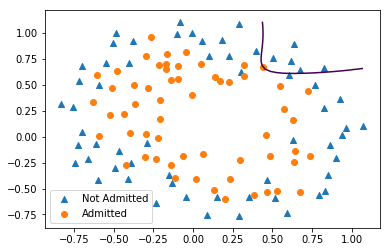

In [53]:
minx1,maxx1=min(x[:,0]),max(x[:,0])
minx2,maxx2=min(x[:,1]),max(x[:,1])
plot_x,plot_y=np.meshgrid(np.linspace(minx1,maxx1),np.linspace(minx2,maxx2))
q= pf.fit_transform(np.c_[plot_x.flatten(),plot_y.flatten()])
a=(q.dot((optim.x).reshape(-1,1)))
r=a.reshape(plot_x.shape)
x=data[:,0:2]
y=data[:,2:3]
pos=np.where(y==0)[0]
neg=np.where(y==1)[0]
pt.scatter(x[pos,0],x[pos,1],marker='^')
pt.scatter(x[neg,0],x[neg,1],marker='o')
pt.legend(['Not Admitted','Admitted'],fancybox=True)
pt.contour(plot_x,plot_y,r.T,[0.5])
pt.show()